In [30]:
import numpy as np
from importlib import reload
import sys
import os

BASE_DIR = os.path.abspath("..")
if BASE_DIR not in sys.path:
    sys.path.append(BASE_DIR)

import Eigen.PowerMethod
reload(Eigen.PowerMethod)
from Eigen.PowerMethod import PWM


import utils.read_data 
reload(utils.read_data)
from utils.read_data import read_pages

import utils.draw_graph
reload(utils.draw_graph)
from utils.draw_graph import draw_graph

# First step

Into the cell below are called two functions:

1) the first function read the data from the dataset
2) the second function plots a random subweb to have a look to the dataset

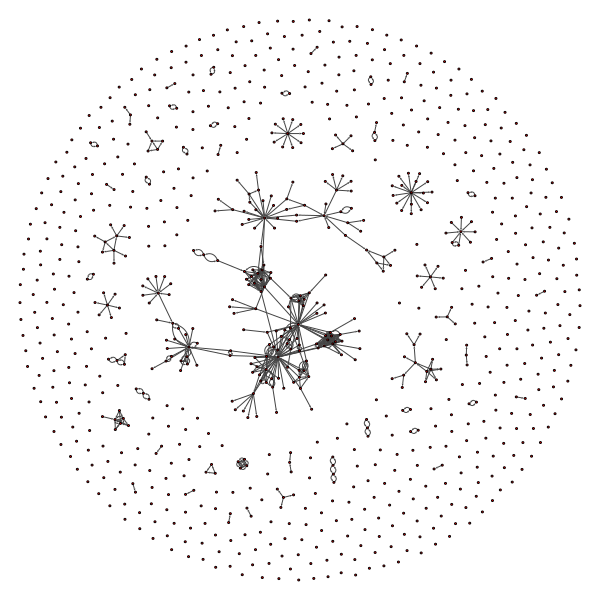

In [31]:
file_path = "DataSet/hollins.dat"

A,node_map,edges = read_pages(file_path)

draw_graph(A, sample_size=900, seed = 9)

# Power method

In the cell below is applied the power method for computing the score 